# Stationary noise removal using Spectral subtraction


In [22]:
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [23]:
audio = '/content/noise+sound.wav'
ipd.Audio(audio)

In [24]:
audio, sr = librosa.load(audio)

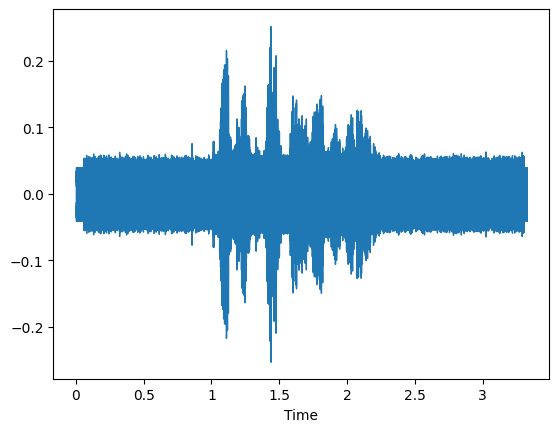

In [25]:
librosa.display.waveshow(audio)

In [26]:
FRAME_LENGTH = 2048
HOP_LENGTH = 512

In [27]:
ft = librosa.stft(y=audio, n_fft=FRAME_LENGTH, hop_length=HOP_LENGTH)

In [28]:
mag_audio = np.abs(ft)
angle_audio = np.angle(librosa.stft(audio, n_fft=FRAME_LENGTH, hop_length=HOP_LENGTH))

In [29]:
log_mag = librosa.amplitude_to_db(mag_audio)

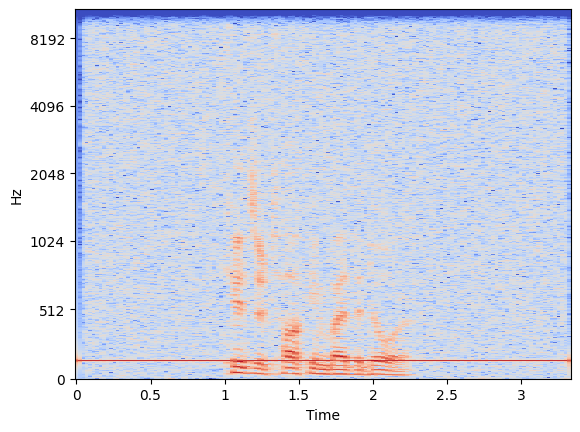

In [30]:
librosa.display.specshow(log_mag, x_axis='time', y_axis='mel')
plt.show()

In [31]:
# Estimate noise spectrum (you can use more advanced methods for better results)
noise_spectrogram = np.mean(mag_audio[:, :100], axis=1)  # Using the first 100 frames as noise estimate

# Spectral subtraction
alpha = 3.0  # A scaling factor to control the amount of noise reduction
enhanced_spectrogram = np.maximum(mag_audio - alpha * noise_spectrogram[:, np.newaxis], 0.0)

# Inverse STFT
enhanced_audio = librosa.istft(enhanced_spectrogram * np.exp(1j * angle_audio), hop_length=HOP_LENGTH)

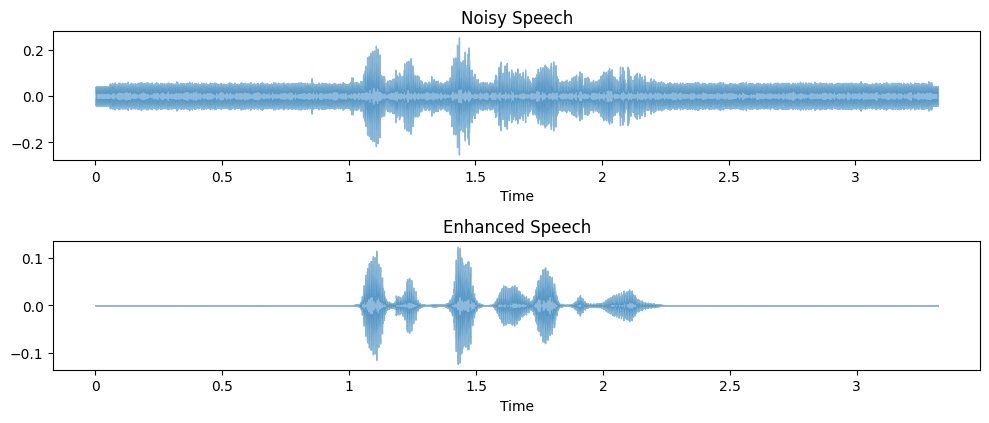

In [32]:
# Plot the original, noisy, and enhanced signals
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
librosa.display.waveshow(audio, alpha=0.5)
plt.title('Noisy Speech')

plt.subplot(3, 1, 2)
librosa.display.waveshow(enhanced_audio, alpha=0.5)
plt.title('Enhanced Speech')

plt.tight_layout()
plt.show()

ipd.Audio(enhanced_audio, rate=sr)

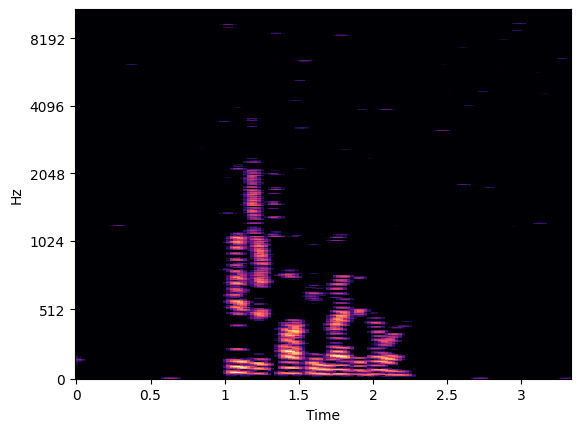

In [33]:
ft_enhanced_audio = librosa.stft(y=enhanced_audio, n_fft=FRAME_LENGTH, hop_length=HOP_LENGTH)
mag_enhanced_audio = np.abs(ft_enhanced_audio)
log_mag_enhanced_audio = librosa.amplitude_to_db(mag_enhanced_audio)
librosa.display.specshow(log_mag_enhanced_audio, x_axis='time', y_axis='mel')
plt.show()